Selected image 1235/5326: 00000195_(6).jpg
Saved → output\00000195_(6)_pixelated_colors20_blocks10.jpg


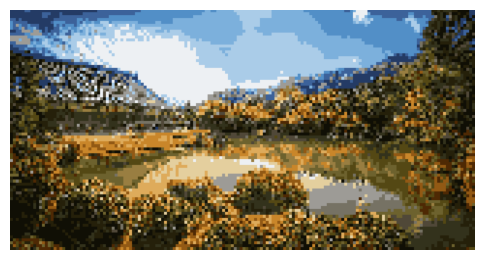

In [13]:
# %%python
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ─── User parameters ────────────────────────────────────────────────────────
input_folder   = 'input'
output_folder  = 'output'
image_index    = 1235                # ← change this to select different images
pixel_blocks   = 10                  # ← e.g. 8, 16, 32…
num_colors     = 20                   # ← set >0 to quantize, 0 to skip
# ────────────────────────────────────────────────────────────────────────────

# ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Get list of all image files in the input folder
image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
image_files.sort()  # Sort alphabetically

# Select image by index
if not image_files:
    raise FileNotFoundError(f"No images found in {input_folder}")
    
if image_index < 0 or image_index >= len(image_files):
    raise IndexError(f"Index {image_index} out of bounds. Total images: {len(image_files)}")

filename = image_files[image_index]
print(f"Selected image {image_index}/{len(image_files)-1}: {filename}")

# helper funcs
def pixelate(img, block):
    h, w = img.shape[:2]
    tiny = cv2.resize(img, (max(1, w//block), max(1, h//block)), interpolation=cv2.INTER_NEAREST)
    return cv2.resize(tiny, (w, h), interpolation=cv2.INTER_NEAREST)

def reduce_colors(img, k):
    data = img.reshape((-1,3)).astype(np.float32)
    crit = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
    _, labels, centers = cv2.kmeans(data, k, None, crit, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    return centers[labels.flatten()].reshape(img.shape)

# load
in_path = os.path.join(input_folder, filename)
img_bgr = cv2.imread(in_path)
if img_bgr is None:
    raise FileNotFoundError(f"Couldn't find {in_path}")
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# process
pix = pixelate(img, pixel_blocks)
out = reduce_colors(pix, num_colors) if num_colors>0 else pix

# build output name
name, ext = os.path.splitext(filename)
out_name = f"{name}_pixelated_colors{num_colors}_blocks{pixel_blocks}{ext}"
out_path = os.path.join(output_folder, out_name)

# save and show
cv2.imwrite(out_path, cv2.cvtColor(out, cv2.COLOR_RGB2BGR))
print(f"Saved → {out_path}")

plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(out)
plt.show()